# **Unsupervised learning : Customer Segmentation Online Shopper**

ในโปรเจ็คนี้จะเป็นทำ Customer Segmentation หรือการแบ่งกลุ่มลูกค้าเป็นกลุ่มย่อย โดยใช้ข้อมูลของ Online Shoppers Purchasing Intention Dataset โดยเป็นข้อมูลความสนใจของคนที่ซื้อขายของออนไลน์


**Content**

1. Import data and python packages

2. Variable Description 

3. Read Dataset

4. Exploratory Data Analysis

5. Data Preprocessing

    * feature selection
    * clean data
    * Normalization
 
6. Clustering with K-means

    *  Elbow methods
    *  Silhouette Analysis

7. Visualization

    * Statistical analysis
    * PCA
    * Radar chart

8. conclusion

## **1.  Import data and python packages**

In [ ]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## **2. Variable Description**

*  "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" : แสดงจำนวนของผู้เยี่ยมชมในแต่ละเพจโดยผู้ใช้งาน และจำนวนเวลาที่ใช้ในแต่ละชนิดของเพจ ค่าของแต่ละ features ได้มาจากข้อมูล URL ของการเยี่ยมชมเพจ โดยผู้ใช้งานและอัปเดตแบบเรียลไทม์เมื่อผู้ใช้งานมีแอคชั่นกับเพจ เช่น การย้ายเพจหนึ่งไปอีกเพจหนึ่ง

*  "Bounce Rate", "Exit Rate" and "Page Value" : features นี้แสดงถึงการวัดผลโดย Google Analytics สำหรับแต่ละเพจในด้าน e-commerce

    *  "Bounce Rate" : ค่าของ features คือ อัตราการตีกลับ ที่แสดงเป็นเปอร์เซ็นของผู้ใช้ที่เข้ามาในเพจแล้วออกไป โดยไม่ได้ทำสิ่งใดๆบนหน้าเพจในระหว่าง session นั้น

    *  "Exit Rate" : ค่าของ feature คือ อัตราการออก ที่คำนวณมาจาก Pageview ทั้งหมดของเว็บ เป็นเปอร์เซ็นในหน้าเพจสุดท้ายของ session

    *  "Page Value" : feature นี้แสดงถึงค่าเฉลี่ยการเยี่ยมชมเว็บเพจของผู้ใช้ ก่อนที่จะเสร็จสิ้นการทำธุรกรรมซื้อขายออนไลน์

*  "Special Day" : feature นี้บ่งชี้ถึงความใกล้ของเวลาที่เยี่ยมชมเว็บไซต์กับวันที่เป็นวันพิเศษ เช่น วันแม่ และวันวาเลนไทน์ ค่าของ attribute นี้กำหนดโดยพิจารณาการเปลี่ยนแปลงการทำธุรกรรมซื้อขายออนไลน์ เช่นเวลาระหว่างวันที่สั่งซื้อและวันที่ส่งถึง

*  ข้อมูลยังประกอบไปด้วย operating system, browser, region, traffic type, ชนิดของผู้เยี่ยมชม : returning or new visitor, ค่า Boolean บ่งชี้ว่าวันที่ของการเยี่ยมชมเพจคือ  weekend, และ month of the year

## **3.  Read Dataset**

ข้อมูล [Online Shoppers Purchasing Intention Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#) ความสนใจของลูกค้าในการซื้อขายของออนไลน์จาก [UCI Machine learning](https://archive.ics.uci.edu/ml/index.php)

In [ ]:
online = pd.read_csv('/content/drive/MyDrive/datasets/online_shoppers_intention/online_shoppers_intention.csv')
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## **4.  Exploratory Data Analysis**

ในการที่จะทำความเข้าใจข้อมูลที่มี ขั้นตอนสำคัญในการทำmachine learning model จำเป็นต้องทำความเข้าใจข้อมูลก่อน เพื่อช่วยทำความเข้าใจในแต่ละตัวแปรของข้อมูล

###Statistical Analysis

In [ ]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
online.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


จะเห็นได้ว่าข้อมูลของ dataset นี้จะประกอบไปด้วยข้อมูลแบบ Continuous และแบบ Categorical  จึงจำเป็นต้องทำการ feature selection ก่อนทำการเทรน machine learning

### Visualization

แสดงการกระจายตัวของข้อมูลแต่ละตัวแปลที่ใช้ในการเทรนด้วย histogram plot

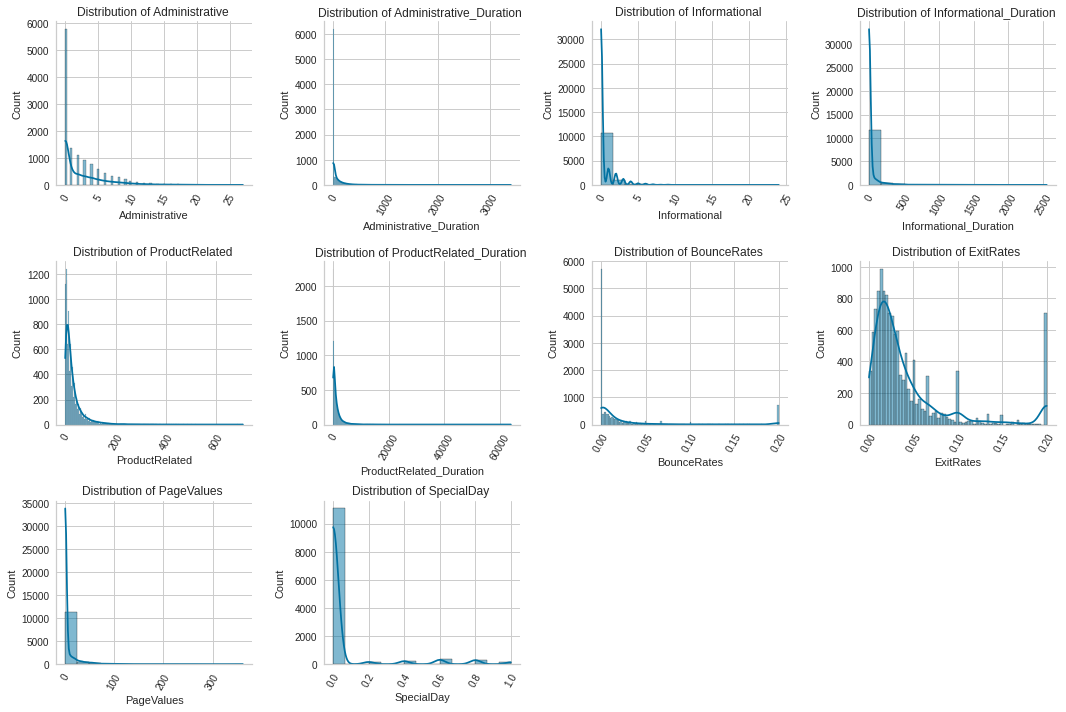

In [ ]:
plt.figure(figsize=[15,10])

for n, col in enumerate(online.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],1):
    plt.subplot(3,4,n)
    ax = sns.histplot(online[col], kde=True)
    sns.despine()
    plt.title("Distribution of {} ".format(col))
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


แสดง ourlier ของข้อมูลด้วย Boxplot

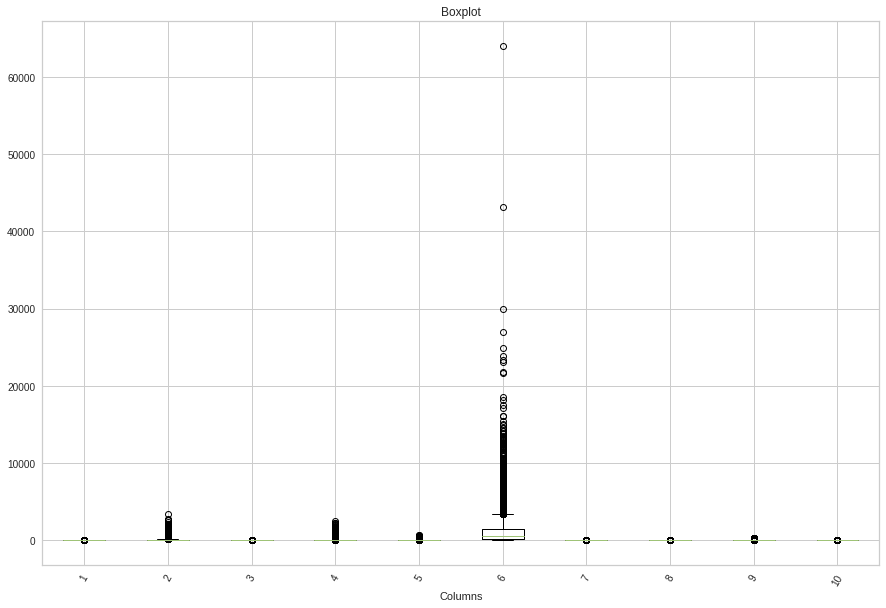

In [ ]:
boxData_list= []
boxColumns_list = []
for (columnName, columnData) in online.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].iteritems():
  boxData_list.append(columnData)
  boxColumns_list.append(columnName)

fig, ax = plt.subplots(figsize=[15,10])
ax.boxplot(boxData_list)
plt.title("Boxplot")
plt.xlabel('Columns')
plt.xticks(rotation=60)
plt.show()


ตรวจสอบความสัมพันธ์ระหว่างตัวแปรด้วย heatmap

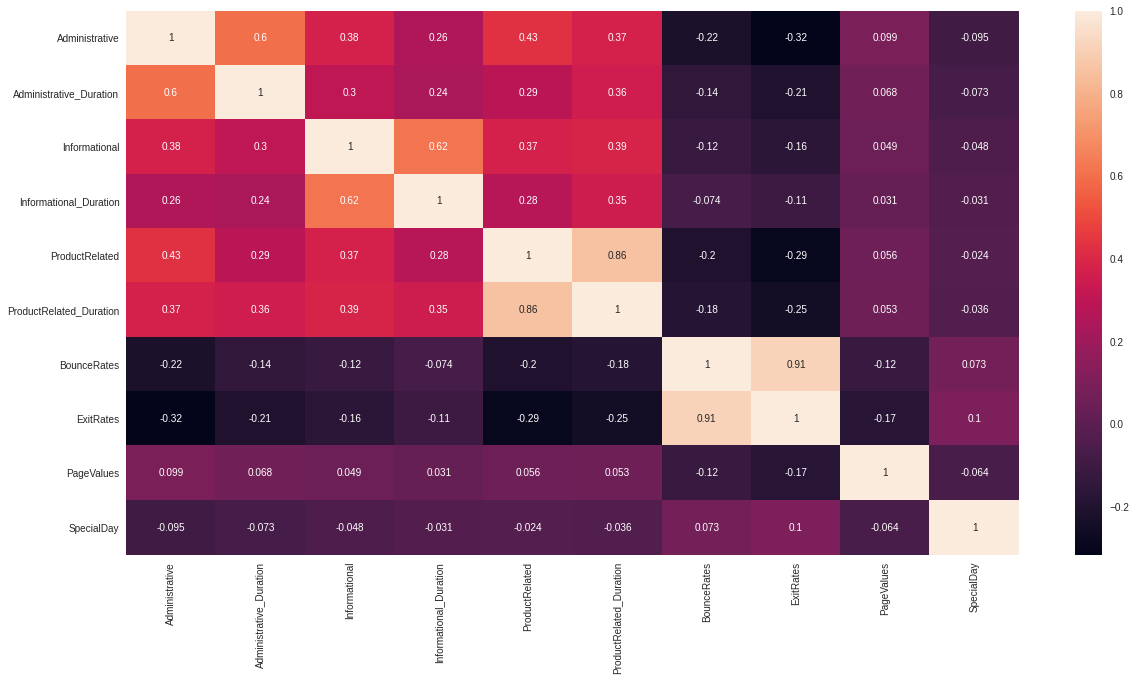

In [ ]:
fig= plt.figure(figsize=(20,10))
sns.heatmap(online.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].corr(), annot = True)
plt.show()

 **สรุป**  จากการสำรวจข้อมูลจะเห็นได้ว่าการกระจายตัวของข้อมูล จากการวัดการกระจายตัวด้วย distribution plot พบว่าข้อมูลการกระจายตัวจะเป็นแบบ skewed distribution และการวัด ourlier ด้วย boxplot จะเห็นได้ว่าข้อมูลมี ourlier เป็นจำนวนมาก

## **5.  Data Preprocessing**

จากการทำ EDA จะเห็นว่าขั้นตอนที่จะต้องทำการ Preprocessing นั้นจะประกอบไปด้วย

*  feature section จะต้องเลือกข้อมูลที่ใช้ในการเทรนโมเดล unsupervised learning ในการทำ customer secmentation

*  clean data ขั้นตอนที่สำคัญในการลดความขาดเคลื่อนของข้อมูล

*  Nomalization จะเห็นได้ว่าข้อมูลมีการกระจายตัวแบบ skewed distribution และข้อมูลมี ourlier เป็นจำนวนมาก จึงจำเป็นต้องใช้วิธีการ log transform เพื่อช่วยลดปัญหาเหล่านี้

### feature section

In [ ]:
online_num = online.iloc[:,:10]

### clean data

ตรวจสอบข้อมูลที่ซ้ำกัน

In [ ]:
print('Number of duplicated :',sum(online.duplicated()))

Number of duplicated : 125


ตรวจสอบข้อมูลที่เป็น NaN

In [ ]:
print('Number of NaN :',online.isnull().sum())

Number of NaN : Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


ลบข้อมูลที่ซ้ำกัน

In [ ]:
online_num = online_num.drop_duplicates()

### Nomalization

ทำการเปลี่ยนข้อมูลให้อยู่ในรูปแบบของ logarithm

In [ ]:
for c in online_num.columns:
  online_num[c] = np.log(online_num[c] + 1) / np.log(100)

clustering_data = online_num
clustering_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.000000,0.000000,0.0,0.0,0.150515,0.000000,0.039591,0.039591,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.238561,0.906457,0.000000,0.020696,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.238561,0.282136,0.010595,0.028452,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.520696,1.399153,0.004300,0.010595,0.000000,0.0
5,0.000000,0.000000,0.0,0.0,0.650515,1.095469,0.003402,0.005269,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12325,0.301030,1.082176,0.0,0.0,0.866197,1.625794,0.001546,0.006214,0.560972,0.0
12326,0.000000,0.000000,0.0,0.0,0.389076,1.334542,0.000000,0.004584,0.000000,0.0
12327,0.000000,0.000000,0.0,0.0,0.422549,1.133879,0.017381,0.018048,0.000000,0.0
12328,0.349485,0.940407,0.0,0.0,0.602060,1.270165,0.000000,0.004524,0.000000,0.0


หลังจจากทำการ log transform จำเป็นต้องตรวจสอบการกระจายตัวของข้อมูลอีกครั้งด้วย histogram plot  

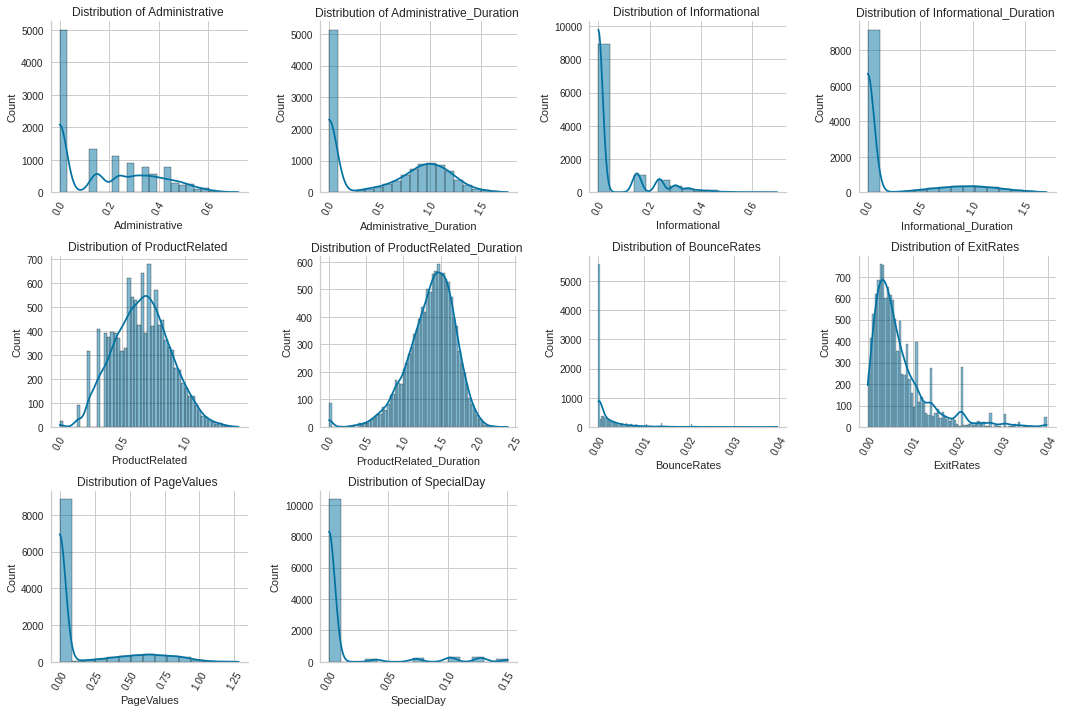

In [ ]:
plt.figure(figsize=[15,10])

for n, col in enumerate(clustering_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],1):
    plt.subplot(3,4,n)
    ax = sns.histplot(clustering_data[col], kde=True)
    sns.despine()
    plt.title("Distribution of {} ".format(col))
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

ตรวจสอบ ourlier หลังจากทำการ log transform

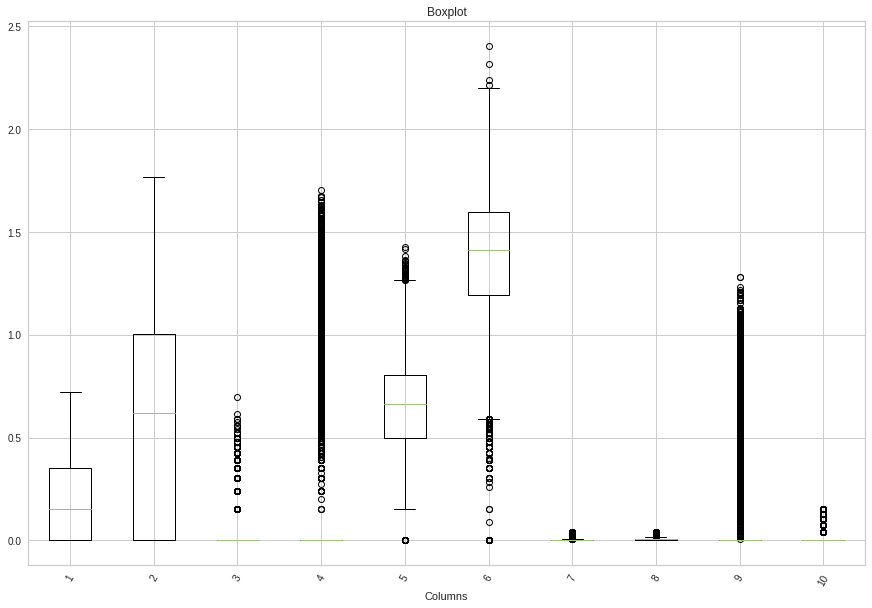

In [ ]:
boxData_list= []
boxColumns_list = []
for (columnName, columnData) in clustering_data.iteritems():
  boxData_list.append(columnData)
  boxColumns_list.append(columnName)

fig, ax = plt.subplots(figsize=[15,10])
ax.boxplot(boxData_list)
plt.title("Boxplot")
plt.xlabel('Columns')
plt.xticks(rotation=60)
plt.show()

จะเห็นได้ว่าการกระจายตัวของข้อมูล มีการเป็นการกระจายแบบปกติมากยิ่งขึ้น และจำนวนของ ourlier ลดลงเป็นอย่างมากด้วยการทำ log transform

## **6.  Clustering with K-means**

จัดกลุ่มของข้อมููลด้วย machine learning โดยโมเดลที่ใช้นั้นจะเป็น k-means  เป็นการค้นหากลุ่มของข้อมูลด้วย machine learning โดยที่ไม่ต้องกำหนด Class หรือไม่ label ซึ้งวิธีนี้อยู่ในกลุ่มของ Unsupervised Learning

###  **Elbow method** 

หาจำนวน Clusters ที่เหมาะสมในการทำ KMeans clustering ด้วยวิธีการ Elbow method




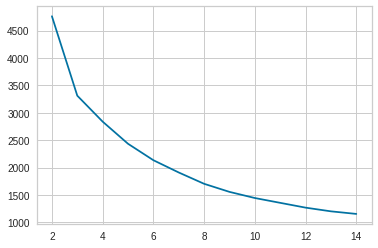

In [ ]:
score_list = []
k_list = range(2, 15)

for k in k_list:
  kmEl = KMeans(n_clusters=k, random_state=0)
  kmEl.fit(clustering_data)
  score = kmEl.inertia_
  score_list.append(score)

plt.plot(k_list, score_list)
plt.show()

จากแสดงในกราฟจะเห็นได้จัดที่เหมาะสมของวิธีการ Elbow method อาจจะดูได้ยากสำหรับข้อมูลชุดนี้จึงจำเป็นต้องทดลองด้วยวิธีการอื่น

### **Silhouette Analysis**

หาจำนวน Clusters ที่เหมาะสมในการทำ KMeans clustering ด้วยวิธีการ Silhouette Analysis

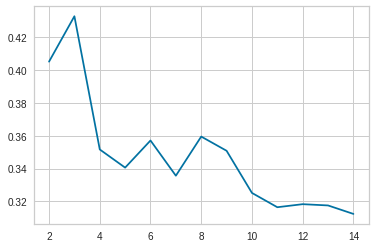

In [ ]:
sil = []

for k in k_list:
  kmSi = KMeans(n_clusters = k).fit(clustering_data)
  labels = kmSi.labels_
  sil.append(silhouette_score(clustering_data, labels, metric = 'euclidean'))

plt.plot(k_list, sil)
plt.show()

จะเห็นได้ว่าจำนวน cluster ที่เหมาะสมจะอยุ่ที่ประมาณ 3 cluster

### **K-means**

เทรนเทรนโมเดลโดยเลือกจำนวน clusters เท่ากับ 3


In [ ]:
km = KMeans(n_clusters=3, random_state=2475)
km.fit(clustering_data)

result = online.iloc[:,:10].drop_duplicates().copy()
result['cluster'] = km.predict(clustering_data)

silhouette_value = silhouette_score(clustering_data, labels, metric = 'euclidean')

แสดงผลของ cluster ด้วย Silhouette plot

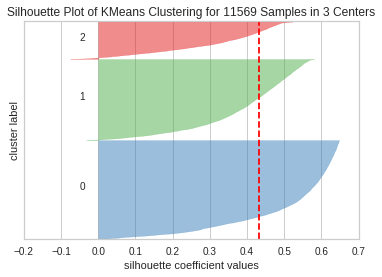

In [ ]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(clustering_data)   
visualizer.poof()

จะเห็นได้ว่าจำนวน cluster เท่ากับ 3 พบว่าทั้ง 3 cluster นั้นมีคะแนนสูงกว่าค่าเฉลี่ย การแบ่งกลุ่มโดยใช้ cluster = 3 นั้นจึงเหมาะสม

In [ ]:
result['cluster'].value_counts()

0    5259
1    4319
2    1991
Name: cluster, dtype: int64

## **7.  Cluster Visualization**

แสดงผลของ Cluster ของการจัดกลุ่ม เพื่อทำความเข้าใจและวิเคราะห์พฤติกรรมของลูกค้า

### Statistical Analysis

แสดงข้อมูลของแต่ละ cluster ด้วยข้อมูลทาง Statistic

In [ ]:
avg_cluster = result.groupby('cluster').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.080434,0.354716,0.108766,2.277477,19.213729,719.240747,0.018564,0.047597,3.701366,0.094657
1,1,3.962954,137.052441,0.076175,0.207353,35.228988,1264.904759,0.006839,0.022616,8.053023,0.037277
2,2,5.524862,202.259429,2.664992,207.017508,68.795078,2753.416952,0.007126,0.021010,9.225544,0.034455


average Revanue of cluster : 
 cluster
0.0    0.101921
1.0    0.202130
2.0    0.249121
Name: Revenue, dtype: float64


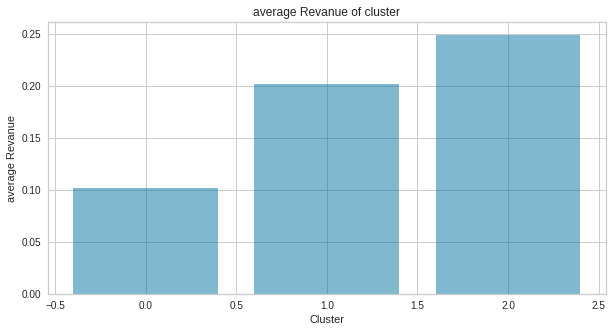

In [ ]:
online['cluster'] = result.cluster
revenue_cluster = online.groupby('cluster')['Revenue'].mean()
print('average Revanue of cluster : \n',revenue_cluster)

plt.figure(figsize=[10,5])
plt.bar(revenue_cluster.index, revenue_cluster.values, align='center', alpha=0.5)
plt.ylabel('average Revanue')
plt.xlabel('Cluster')
plt.title('average Revanue of cluster')

plt.show()

### PCA

ลดขนาดของ feature ให้เหลือ 2 เพิ่อสร้างกราฟแสดงความสัมพันธ์ระหว่าง dimension แบ่งประเภทโดย cluster ต่างๆ

In [ ]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(clustering_data)

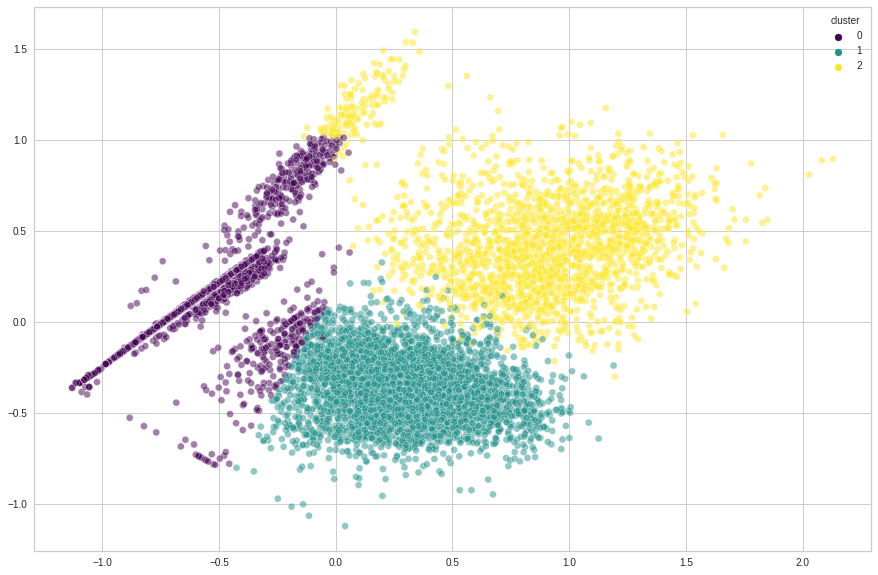

In [ ]:
plt.figure(figsize=[15,10])
sns.scatterplot(x=pca_feat[:,0], y=pca_feat[:,1], hue=result['cluster'], alpha=0.5, palette='viridis')
plt.show()

### Radar chat

แสดงรายละเอียดของข้อมูลของแต่ละ cluster ด้วย Radar chart

In [ ]:
def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    N = len(feat_cols)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    my_color = plt.cm.get_cmap("Set2", len(df.index))

    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["0.2","0.4","0.6","0.8","1"], color="grey", size=size)
        plt.ylim(0,1)

        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

แสดง radar chart ของแต่ละ cluster

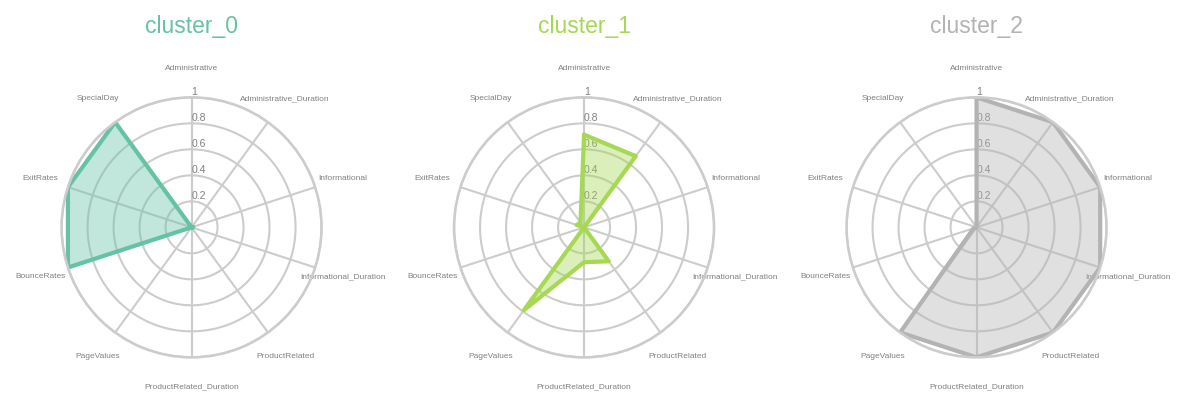

In [ ]:
feature_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'BounceRates', 'ExitRates', 'SpecialDay']

cluster_col = 'cluster'
label_list = [i for i in range(3)]

plot_radar_df(avg_cluster, feature_cols, cluster_col, label_list, split_chart=True, dpi=100)

แสดง radar chart ของทุก cluster เปรียบเทียบกัน

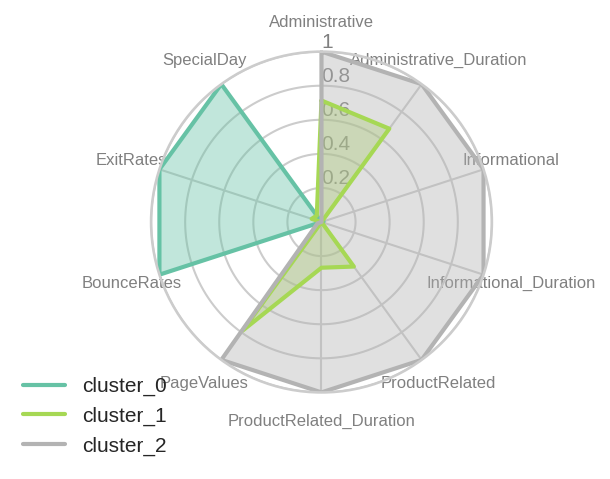

In [ ]:
plot_radar_df(avg_cluster, feature_cols, cluster_col, label_list, split_chart=False, dpi=150, n_cols=3, fig_h=4, fig_w=4)

# **Conclusion**

จากการทำ customer segmentation หรือการแบ่งกลุ่มฐานของลูกค้าที่เข้ามาซื้อขายของออนไลน์ จะเห็นว่าสามารถแบ่งกลุ่มลูกค้าที่เหมาะสมได้อย่างชัดเจนเป็น 3 กลุ่ม จากการวัด cluster ที่เหมาะสมด้วยวิธีการ Silhouette Analysis จะสามารถแบ่งกลุ่มลูกค้าได้เป็นดังนี้

*  Cluster 0  : เป็นตัวแทนของกลุ่มผู้ที่เข้ามาเยี่ยมชมเว็บเพจโดยที่ส่วนใหญ่จะเข้ามาในช่วงของวันพิเศษ โดยที่อัตราการตีกลับ อัตราการออกของเพจนั้นอยู่ที่ระดับสูง และจะมีการซื้อขายของลูกค้ากลุ่มนี้จากผู้ที่เข้าเยี่ยมชมเว็บเพจในกลุ่มเพียง 10%

*  Cluster 1 : เป็นตัวแทนของกลุ่มลูกค้ากลางๆ เมื่อเปรียบเทียบกับ cluster อื่นๆ จะเห็นได้ว่าจะมีผู้เยี่ยมชมเว็บเพจในหน้าของ Administrative และ หน้าที่เกี่ยวข้องกับ product  โดยที่จำนวนลูกค้าที่ซื้อของโดยจากผู้ที่เข้าชมเว็บเพจกลุ่มนี้มีถึง 20%

*  Cluster 2 : เป็นตัวแทนของกลุ่มค้าเป็นส่วนน้อย แต่ที่จะมีจำนวนลูกค้าที่ซื้อของโดยจากผู้ที่เข้าชมเว็บเพจกลุ่มนี้มีถึง 25% โดยที่ผู้ที่เยี่ยมชมเว็บเพจกลุ่มนี้จะใช้เวลาในแต่ละเพจที่สูง และมีอัตราการตีกลับหรืออัตราการออกที่ต่ำ